<a href="https://colab.research.google.com/github/Anshul007/hepatitis_predictions/blob/main/Hepatitis_Mortality_Prediction_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Science Project

#### Question
+ Predict if a patient will live or dies based on the parameters using ML


#### Workflow
+ Data Prep
+ EDA
+ Feature Selection
+ Build Model
+ Interpret Model
+ Serialization
+ Production with Streamlit or Flask


In [4]:
# Load Our EDA Pkgs
import pandas as pd 
import numpy as np

In [5]:
# Load Data Viz Pkgs

%matplotlib inline 
# setting Matplotlib to plot inline, which means that the outputted plot will appear immediately under each code cell
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.monospace'] = 'Ubunto Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (16,10)

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving hepatitis.data to hepatitis (6).data
User uploaded file "hepatitis.data" with length 7545 bytes


In [7]:
# Load Our Dataset
df = pd.read_csv(r"hepatitis.data")

In [8]:
# Preview the first datapoint
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes

In [9]:
# Storing all the Names in a list
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [10]:
df = pd.read_csv("hepatitis.data",names=col_names)
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [11]:
# Clean our Column Names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [12]:
# Convert ot lowercase and replacing space into "_"
df.columns.str.lower().str.replace(' ','_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [13]:
# Storing again into the dataframe
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [14]:
# Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            155 non-null    int64 
 1   age              155 non-null    int64 
 2   sex              155 non-null    int64 
 3   steroid          155 non-null    object
 4   antivirals       155 non-null    int64 
 5   fatigue          155 non-null    object
 6   malaise          155 non-null    object
 7   anorexia         155 non-null    object
 8   liver_big        155 non-null    object
 9   liver_firm       155 non-null    object
 10  spleen_palpable  155 non-null    object
 11  spiders          155 non-null    object
 12  ascites          155 non-null    object
 13  varices          155 non-null    object
 14  bilirubin        155 non-null    object
 15  alk_phosphate    155 non-null    object
 16  sgot             155 non-null    object
 17  albumin          155 non-null    ob

In [15]:
# Replacing "?" with "0" in all the data frame
df = df.replace('?',0)
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [16]:
# To check how many columns with object
sum(df.dtypes == 'object')

15

In [17]:
# printing those object names
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [18]:
# Casting
# (Integer) Convert from one dt to another
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

# (Float) Convert from one dt to another
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          155 non-null    int64  
 4   antivirals       155 non-null    int64  
 5   fatigue          155 non-null    int64  
 6   malaise          155 non-null    int64  
 7   anorexia         155 non-null    int64  
 8   liver_big        155 non-null    int64  
 9   liver_firm       155 non-null    int64  
 10  spleen_palpable  155 non-null    int64  
 11  spiders          155 non-null    int64  
 12  ascites          155 non-null    int64  
 13  varices          155 non-null    int64  
 14  bilirubin        155 non-null    float64
 15  alk_phosphate    155 non-null    int64  
 16  sgot             155 non-null    int64  
 17  albumin         

### Narative (Status)
+ Most of the data were in objects
+ Two of them were in float

In [19]:
### Count of each row
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [20]:
# Shape of dataset
df.shape

(155, 20)

In [21]:
### Missing Values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

#### EDA
+ Descriptive analytics

In [22]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


#### Feature01: class

In [23]:
target_label = {"Die":1,"Live":2}

2    123
1     32
Name: class, dtype: int64


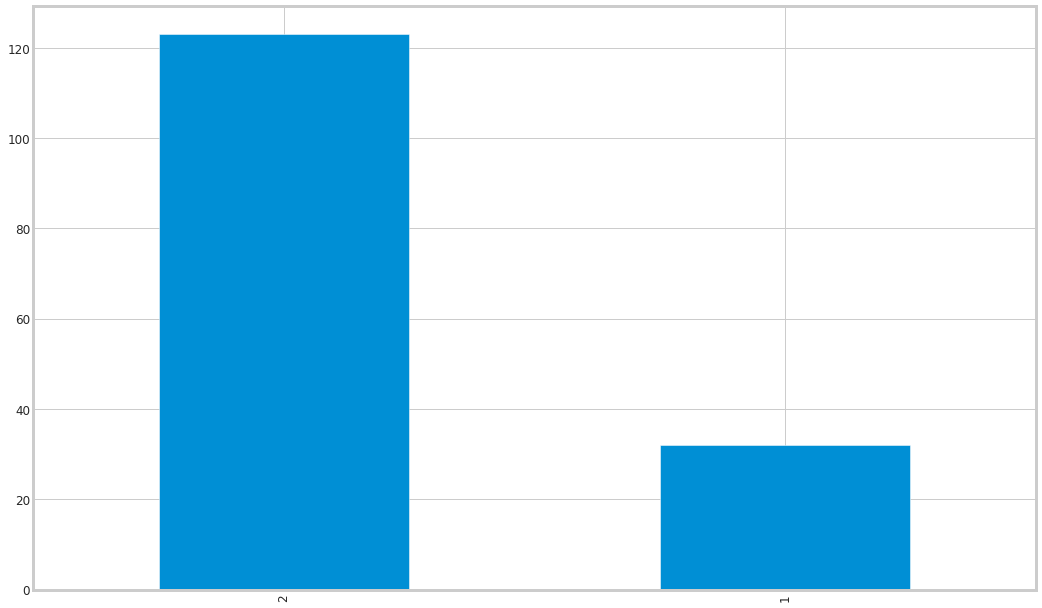

In [24]:
# Value counts of "class" feature
print(df['class'].value_counts())

# plot the distribution of "class" feature
df['class'].value_counts().plot(kind='bar')

#### Feature02: sex

In [25]:
### How many are males(1) and females(2)
df['sex'].unique()

array([2, 1])

1    139
2     16
Name: sex, dtype: int64


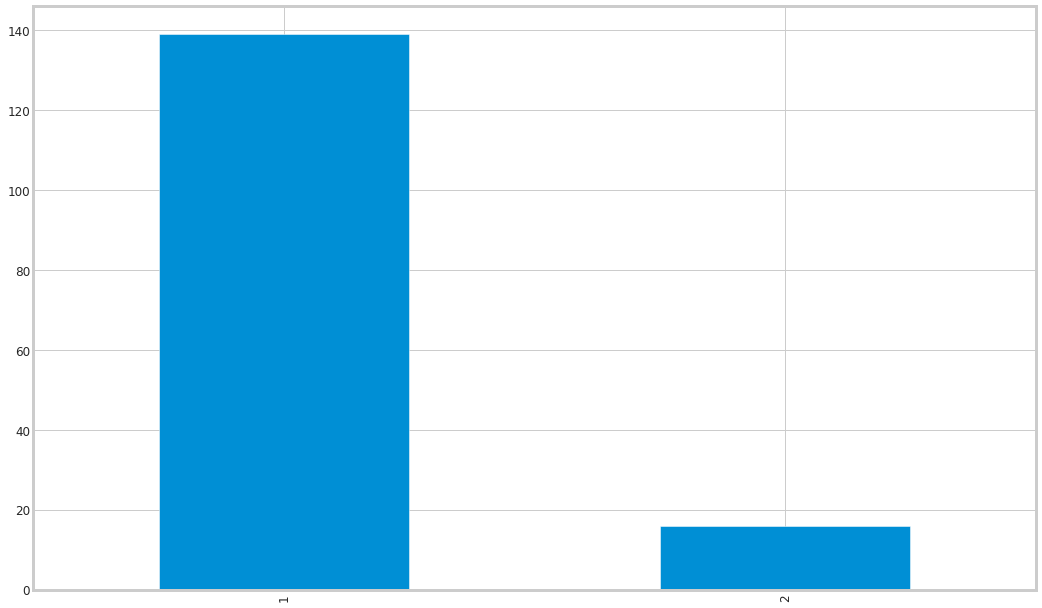

In [26]:
# Value counts of "class" feature
print(df['sex'].value_counts())

# plot the distribution of "class" feature
df['sex'].value_counts().plot(kind='bar')

### Narative
+ There are more males than females in ourdataset

#### Feature03: age

In [27]:
### Age Range
df.groupby(['age','sex']).size()

# This is not giving any insights

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

#### Frequency Distribution Table using the Age Range

In [28]:
# to get the minimum and maximum of "age"
df['age'].describe()

count    155.000000
mean      41.200000
std       12.565878
min        7.000000
25%       32.000000
50%       39.000000
75%       50.000000
max       78.000000
Name: age, dtype: float64

In [29]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]

# using pd.cut()
freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [30]:
freq_df = freq_df.reset_index(name='count')
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


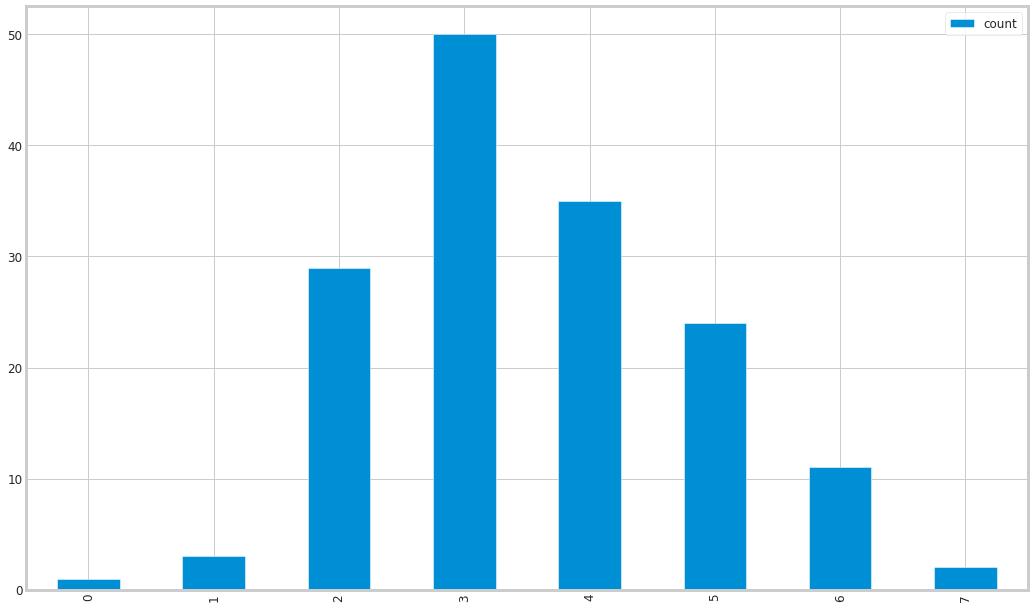

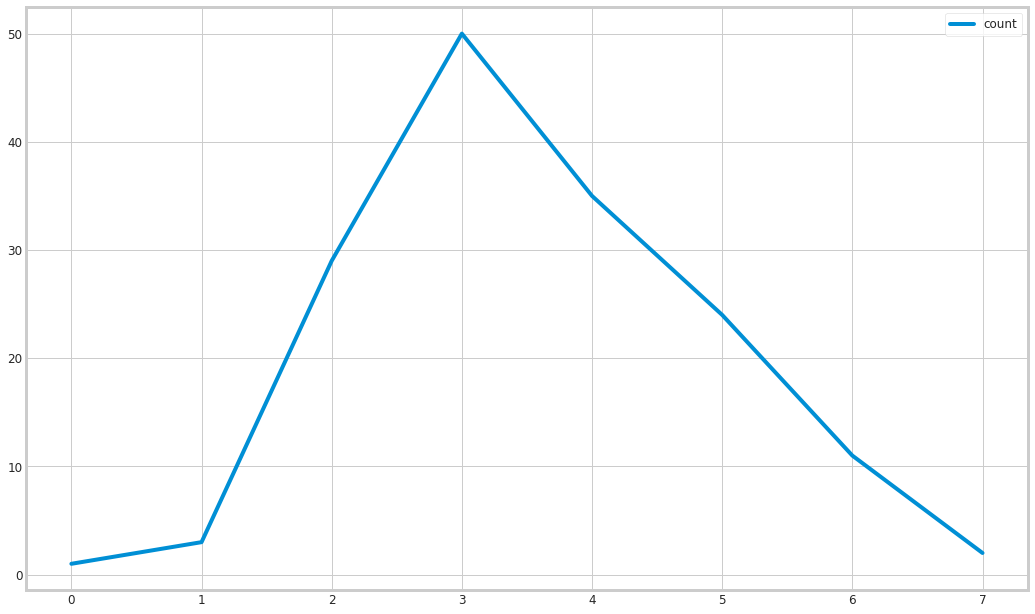

In [31]:
freq_df.plot(kind='bar')
freq_df.plot(kind='line')

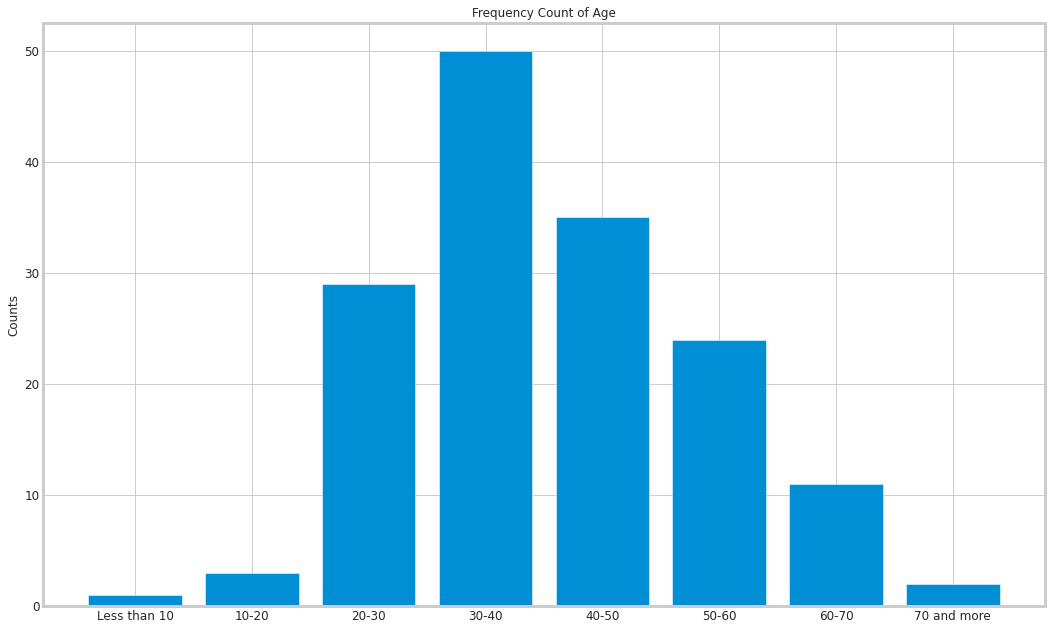

In [32]:
plt.figure(figsize=(16,10))

# Plot of Freq Table
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

### Narative
+ Highest prevalence of Hepatitis is from 30-40 followed by 40-50
+ The least is individual under 10, and elderly above 70

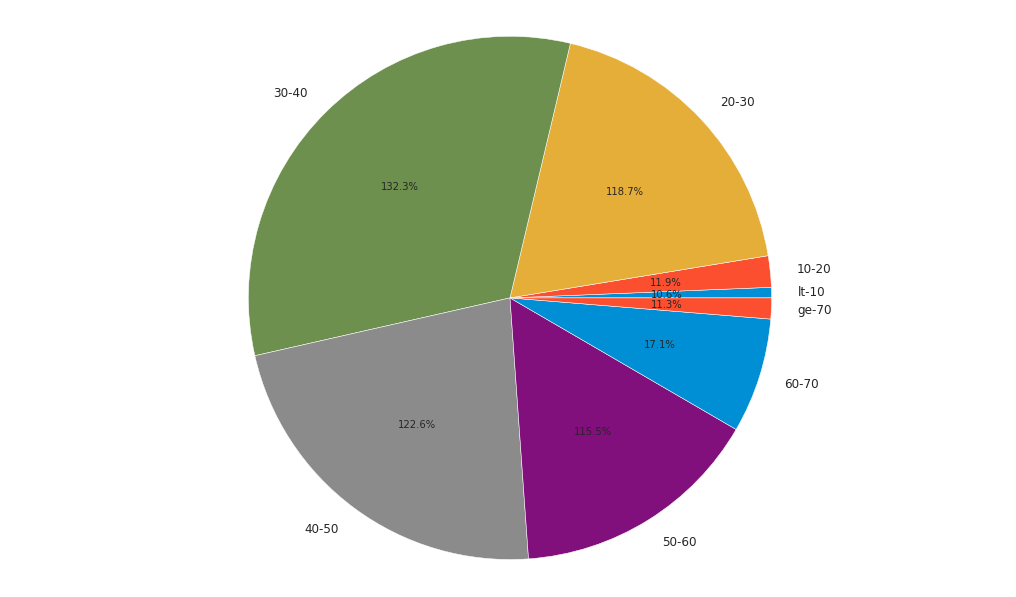

In [33]:
# Pie chart
labels = ['lt-10',"10-20","20-30","30-40","40-50","50-60","60-70","ge-70"]
fig1,ax1 = plt.subplots()
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

### Checking for Outliers
+ Univariate Analysis
+ Multivariate Analysis

#### Methods
+ Boxplot(Univarient)
+ Scatterplot (Multivarient)
+ Z-score
+ IQR Interquartile Range

In [34]:
# Using Boxplot for Univariate Outlier Detection
import seaborn as sns

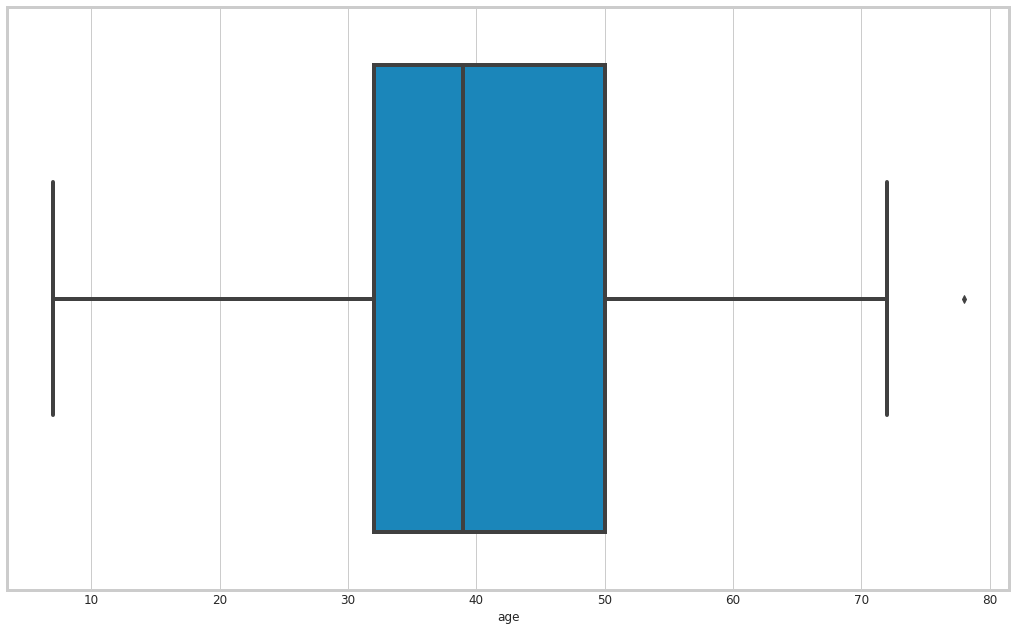

In [35]:
sns.boxplot(df['age'])

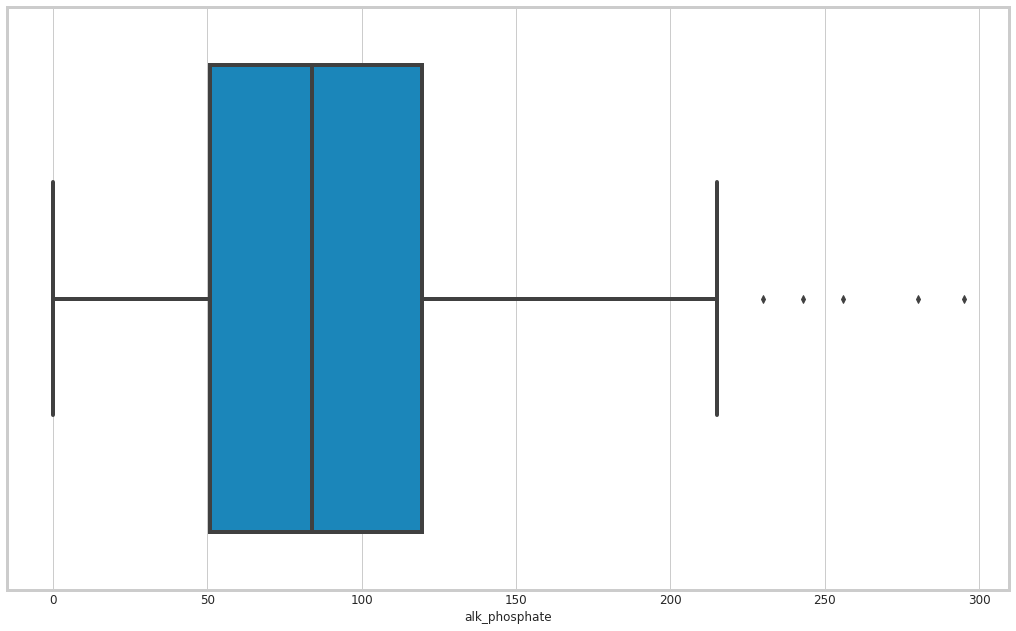

In [36]:
sns.boxplot(df['alk_phosphate'])

In [37]:
# to cross verify that only one value id there which will be outside in boxplot
df[df['age'] == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


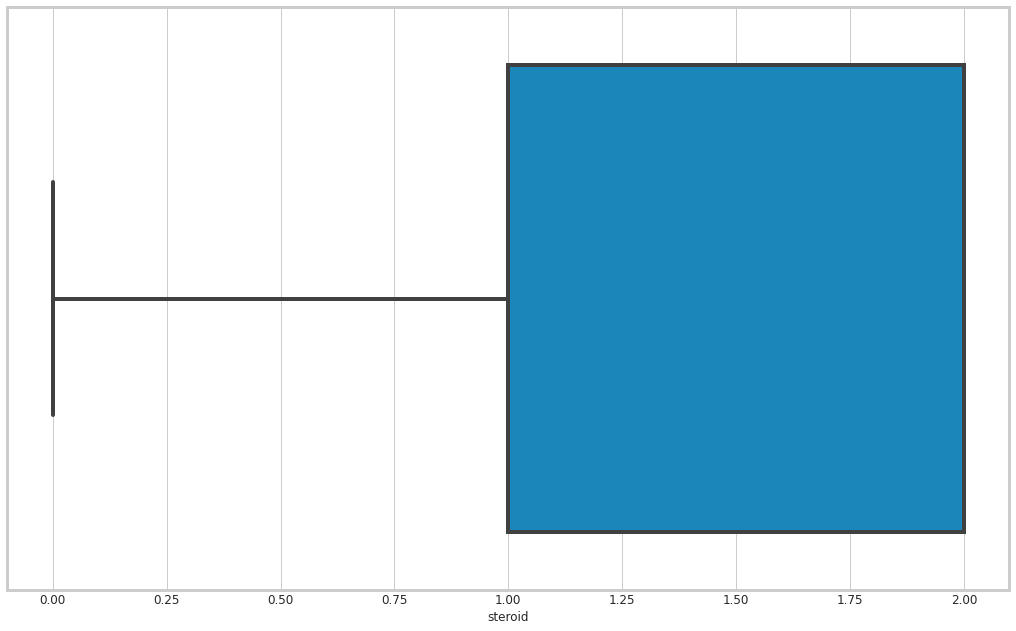

In [38]:
# using boxplot for outlier detection
sns.boxplot(df['steroid'])

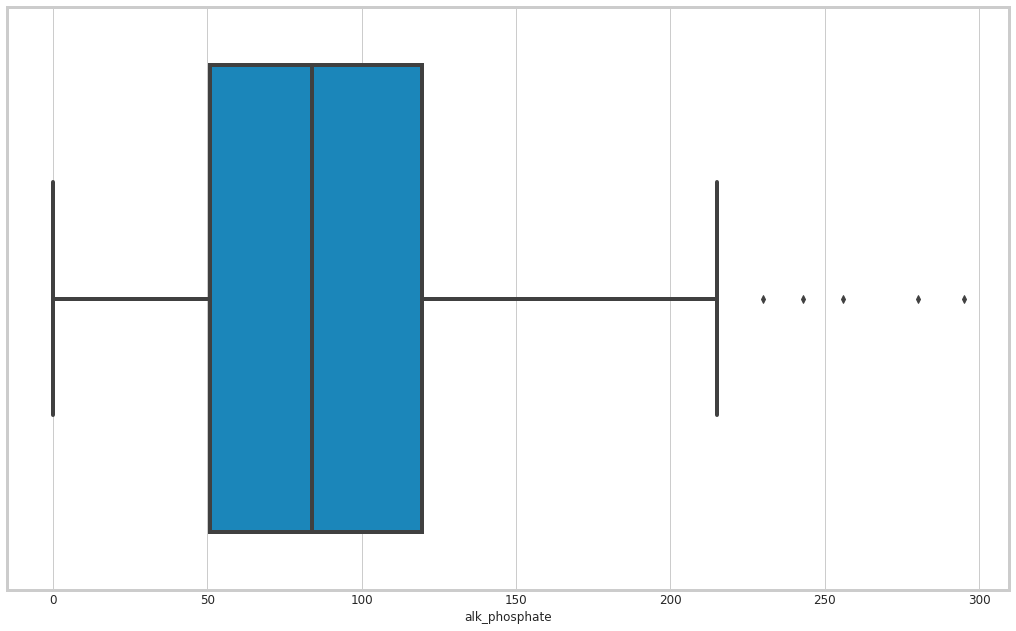

In [39]:
sns.boxplot(df['alk_phosphate'])

#### Use Scatterplot to detect outliers

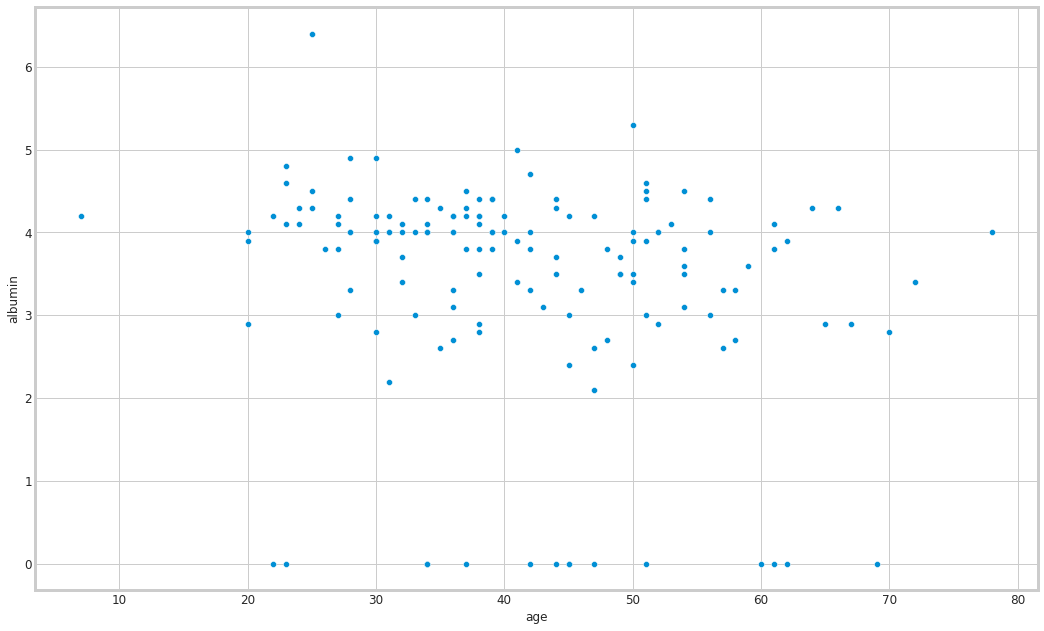

In [40]:
# Scatterplot
sns.scatterplot(df['age'],df['albumin'])

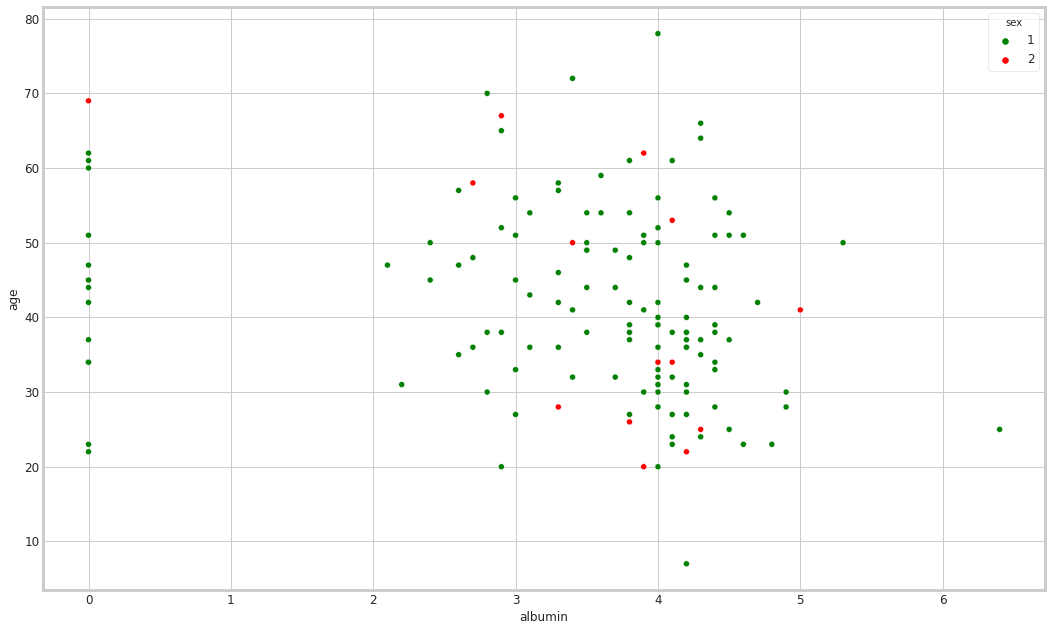

In [41]:
# Scatter plot
sns.scatterplot(x=df['albumin'],y=df['age'],hue=df['sex'], palette=['green','red'],data=df)

#### using Interquartile Range(IQR)
+ H-Spread/Mid_spread
+ Measures the statistical dispersion/spread
+ IQR = Quantile 3(75) - Quantile 1(25)

In [42]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

In [43]:
IQR = q3 - q1
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [44]:
### Get the actual datapoint that is an outlier
(df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


### Narative
+ The data points with true are the outlier

<h3>Note:</h3>

+ False = "No there is no outliers"
+ True = "Yes there is a outliers"

### Solution
+ Remove
+ Change
+ Ignore

In [45]:
# This will give all the values which will be there in interqutertile range
df[((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

# This will give all the values which will be not come under interqutertile range
df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]
df_no_outlier

#Note: Here ~ this sign will give you the opposite sign.

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [46]:
# comparing the outlier with the whole data.
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


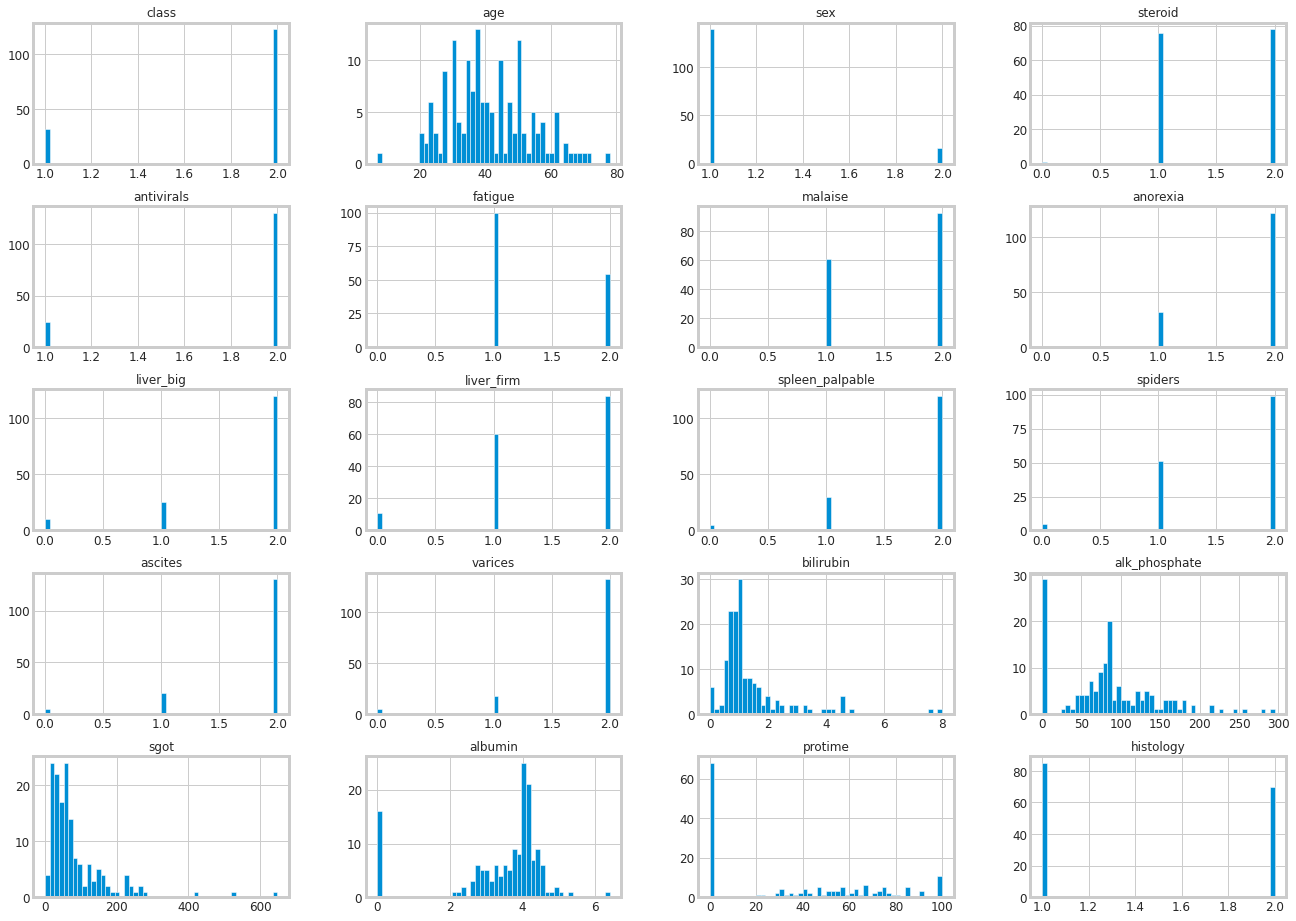

In [47]:
### Plot of distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

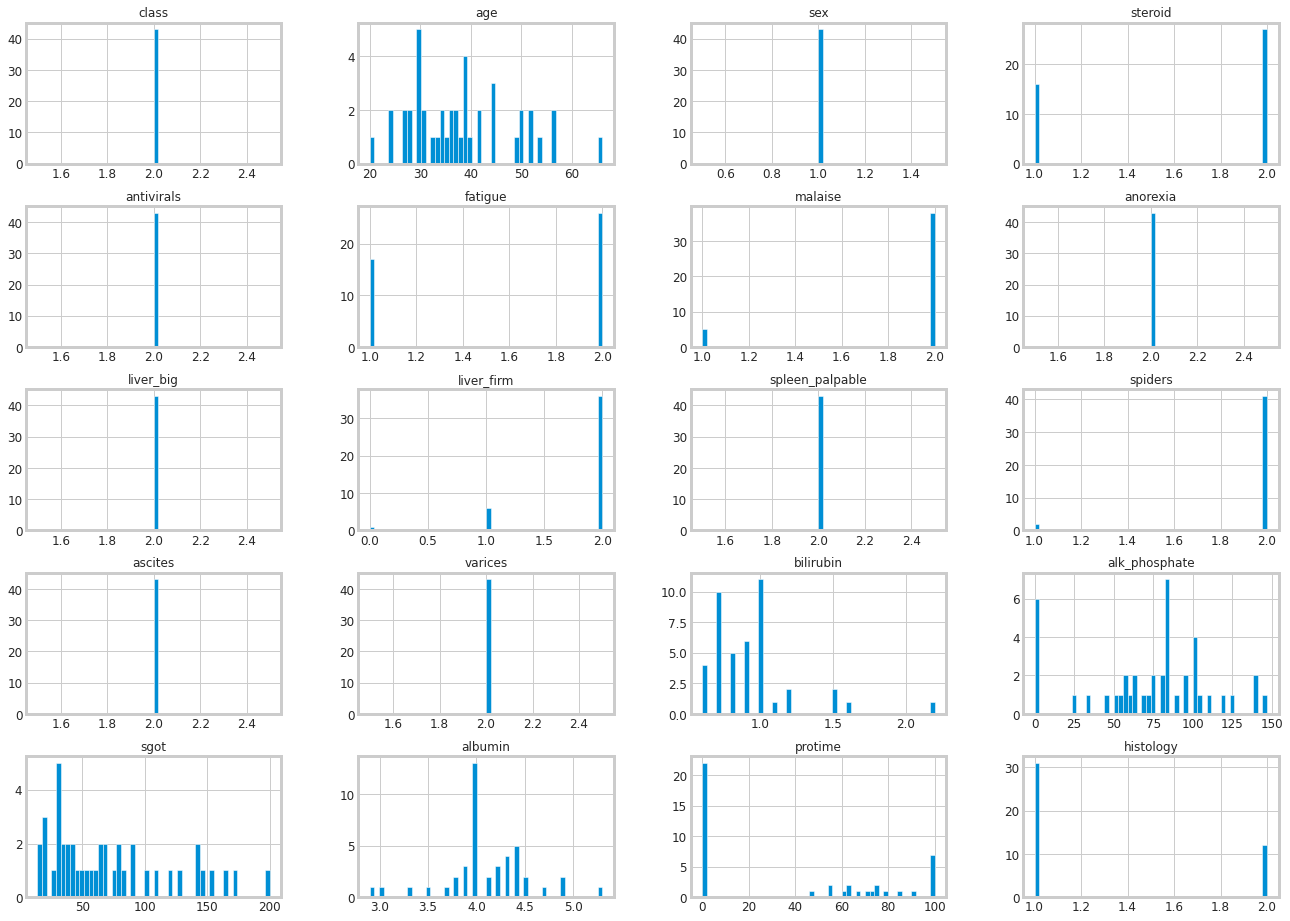

In [48]:
### Plot of distribution of data
df_no_outlier.hist(bins=50,figsize=(20,15))
plt.show()

#### Feature Selection and Importance
+ SelectKbest
    - Strong relation with the output/target
+ Recursive Feature Elimination

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [50]:
# Features and Labels
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [51]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [52]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
ylabels = df['class']

In [53]:
# using Skbest
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(xfeatures,ylabels)

Single Post Underscore is used for naming your variables as Python Keywords and to avoid the clashes by adding an underscore at last of your variable name.

In [54]:
# Highest score shows the best fit
print("Scores",best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [55]:
# Transform(Optional) those feature score in a good format.
bf_02 = best_feature_fit.transform(xfeatures)
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [56]:
# Create a dataframe to check which feature is more important

# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])
feature_column = pd.DataFrame(xfeatures.columns,columns=['Feature_name'])

# to concat in one data frame.
best_feat_df = pd.concat([feature_scores,feature_column],axis=1)
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


<h3>Note:</h3>The higher the number the more important the feature

In [57]:
# Get the top 10 feature 
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [58]:
best_feat_df.nlargest(12,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [59]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

#### Recursive Feature Elimination

In [60]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [61]:
logit = LogisticRegression()

In [62]:
rfe = RFE(logit,8)

In [63]:
rfe_fit = rfe.fit(xfeatures,ylabels)

In [64]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])

In [65]:
rfe_feature_df = pd.concat([feature_column,selected_features,ranking_features],axis=1)
rfe_feature_df

,Feature_name,Selected_Features,ranking_Features
0,age,False,9
1,sex,True,1
2,steroid,False,5
3,antivirals,False,8
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


### Narative
+ RFE we will eliminate the lowest ranting or true

#### Checking for Feature Importance
+ ExtraTreeClassifier
+ Which feature is important

In [66]:
from sklearn.ensemble import ExtraTreesClassifier

In [67]:
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures,ylabels)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [68]:
# Print Important
print(et_clf.feature_importances_)


[0.04975943 0.0217785  0.02965147 0.01041276 0.02782863 0.04937337
 0.02900042 0.04004574 0.05274269 0.03813161 0.07460798 0.09004923
 0.06164331 0.10340794 0.06424957 0.05247282 0.0770979  0.06206678
 0.06567985]


In [69]:
feature_imporance_df = pd.Series(et_clf.feature_importances_,index=xfeatures.columns)
feature_imporance_df

age                0.049759
sex                0.021778
steroid            0.029651
antivirals         0.010413
fatigue            0.027829
malaise            0.049373
anorexia           0.029000
liver_big          0.040046
liver_firm         0.052743
spleen_palpable    0.038132
spiders            0.074608
ascites            0.090049
varices            0.061643
bilirubin          0.103408
alk_phosphate      0.064250
sgot               0.052473
albumin            0.077098
protime            0.062067
histology          0.065680
dtype: float64

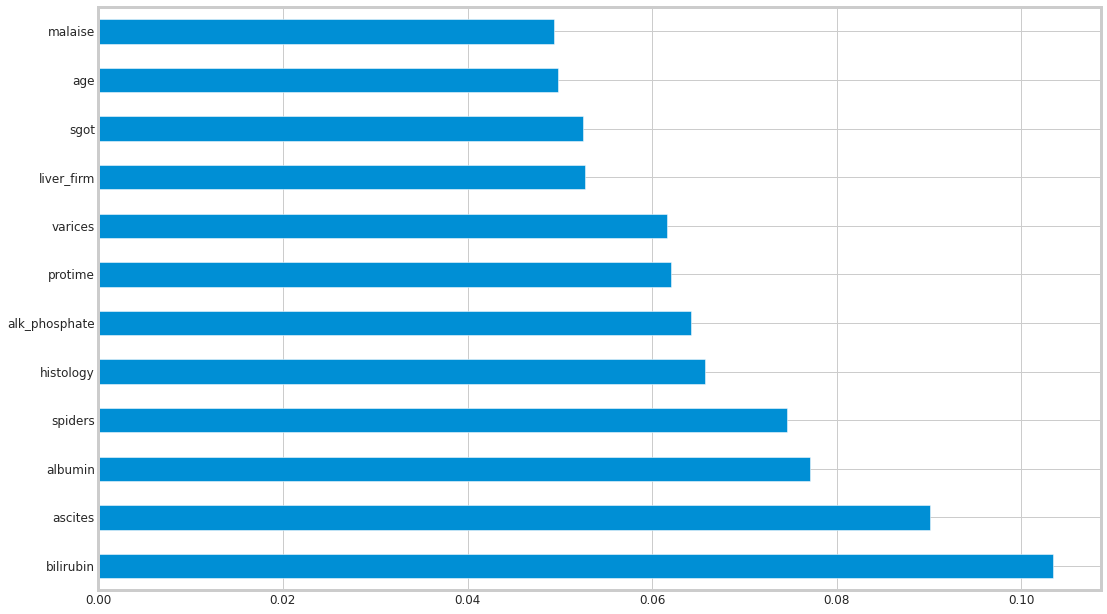

In [70]:
feature_imporance_df.nlargest(12).plot(kind='barh')

#### Narrative
+ All the methods gave us almost the same features to use

In [71]:
# Correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


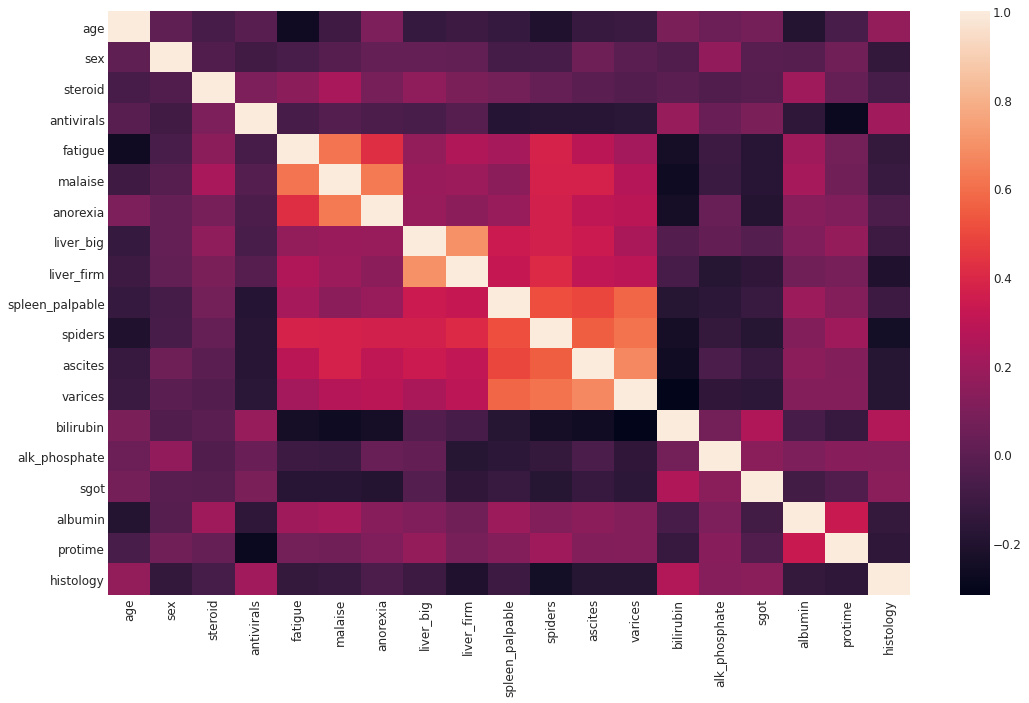

In [72]:
# Heatmap for Correlation
sns.heatmap(xfeatures.corr())

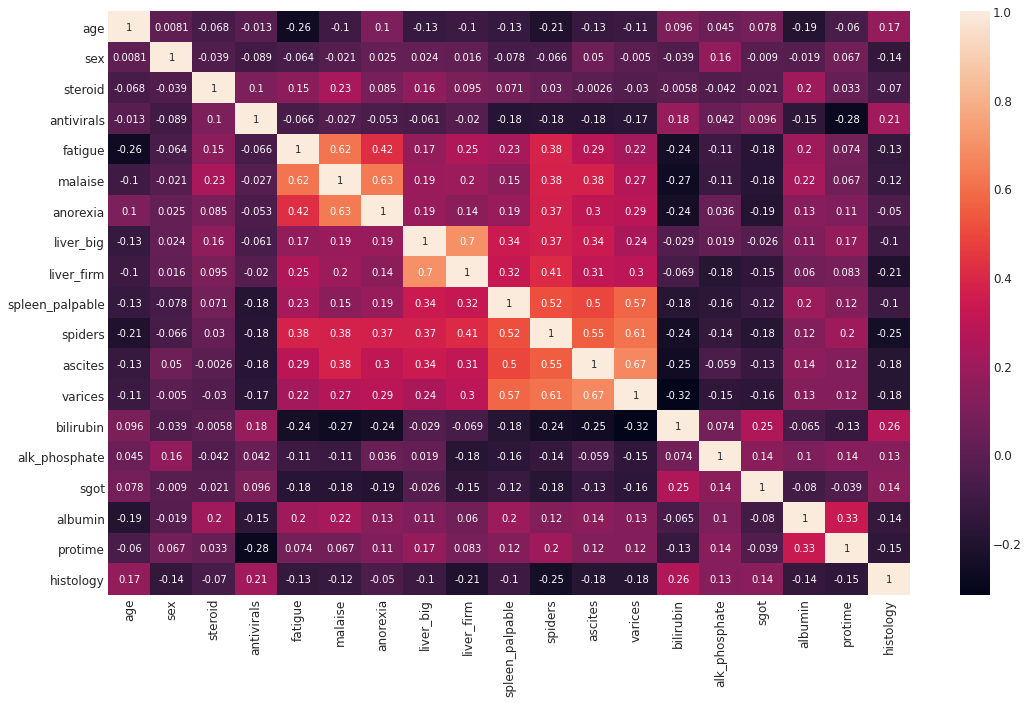

In [73]:
# Heatmap for Correlation with Annot
sns.heatmap(xfeatures.corr(),annot=True)

### Model Building
+ Feature & Labels
+ Train/Test/Split
+ LogisticRegression
+ RF
+ DCT
+ Serialize

In [74]:
# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### Features for Initial Data

In [75]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [76]:
xfeatures

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,0,242,3.3,50,2
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,0,2
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75,20,4.1,0,2
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


In [77]:
ylabels = df['class']

#### Selected Features

In [78]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [79]:
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals','fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [80]:
# train /test dataset
x_train,x_test,y_train,y_test = train_test_split(xfeatures,ylabels,test_size=0.30,random_state=7)

# train /test dataset for best features
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(xfeatures_best,ylabels,test_size=0.30,random_state=7)

### Building Model: All Feature

In [81]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train) #Fit the model according to the given training data.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
# Model Accuracy
# Method 1
logreg.score(x_test,y_test) #Return the mean accuracy on the given test data and labels.

0.723404255319149

In [83]:
# Method 2 
logreg.predict(x_test) #Predict class labels for samples in X.

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [84]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [85]:
accuracy_score(y_test,logreg.predict(x_test))

0.723404255319149

### Building Model: Best Feature

In [86]:
# Building Model
model_logit = LogisticRegression()
model_logit.fit(x_train_b,y_train_b)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# Model Accuracy
# Method 1
model_logit.score(x_test_b,y_test_b)

0.723404255319149

In [88]:
### Single Prediction
x_test.iloc[3]

age                 32.0
sex                  1.0
steroid              2.0
antivirals           1.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            2.0
liver_firm           1.0
spleen_palpable      2.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            1.0
alk_phosphate       59.0
sgot               249.0
albumin              3.7
protime             54.0
histology            1.0
Name: 11, dtype: float64

In [89]:
res_dic = {"Die":1,"Live":2}
x1 = x_test.iloc[1]

In [90]:
# single prediction

# Reshaping 
logreg.predict(np.array(x1).reshape(1,-1))

array([2])

### Alternative Algorithms


In [91]:
clf = DecisionTreeClassifier()


In [92]:
# Fit
clf.fit(x_train_b,y_train_b)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [93]:
# Model Accuracy Score
clf.score(x_test_b,y_test_b)

0.7446808510638298

In [94]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [95]:
knn = KNeighborsClassifier(n_neighbors=3)

In [96]:
# Fit
knn.fit(x_train_b,y_train_b)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [97]:
# Model Accuracy Score
knn.score(x_test_b,y_test_b)

0.7446808510638298

#### Save Our Model
+ Serialization
+ Pickle
+ Joblib
+ numpy/json/ray

In [98]:
# Using Joblib
import joblib

In [99]:
model_file = open("logistic_regression_hepB_model.pkl","wb")
joblib.dump(model_logit,model_file)
model_file.close()

In [100]:
model_file_knn = open("knn_hepB_model.pkl","wb")
joblib.dump(knn,model_file_knn)
model_file_knn.close()

In [101]:
model_file_clf = open("decision_tree_clf_hepB_model.pkl","wb")
joblib.dump(clf,model_file_clf)
model_file_clf.close()

In [102]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [103]:
feature_names_best = xfeatures_best.columns

In [104]:
target_names = ["Die","Live"]

In [105]:
# Create A Dot Plot
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=feature_names_best,class_names=target_names)

# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

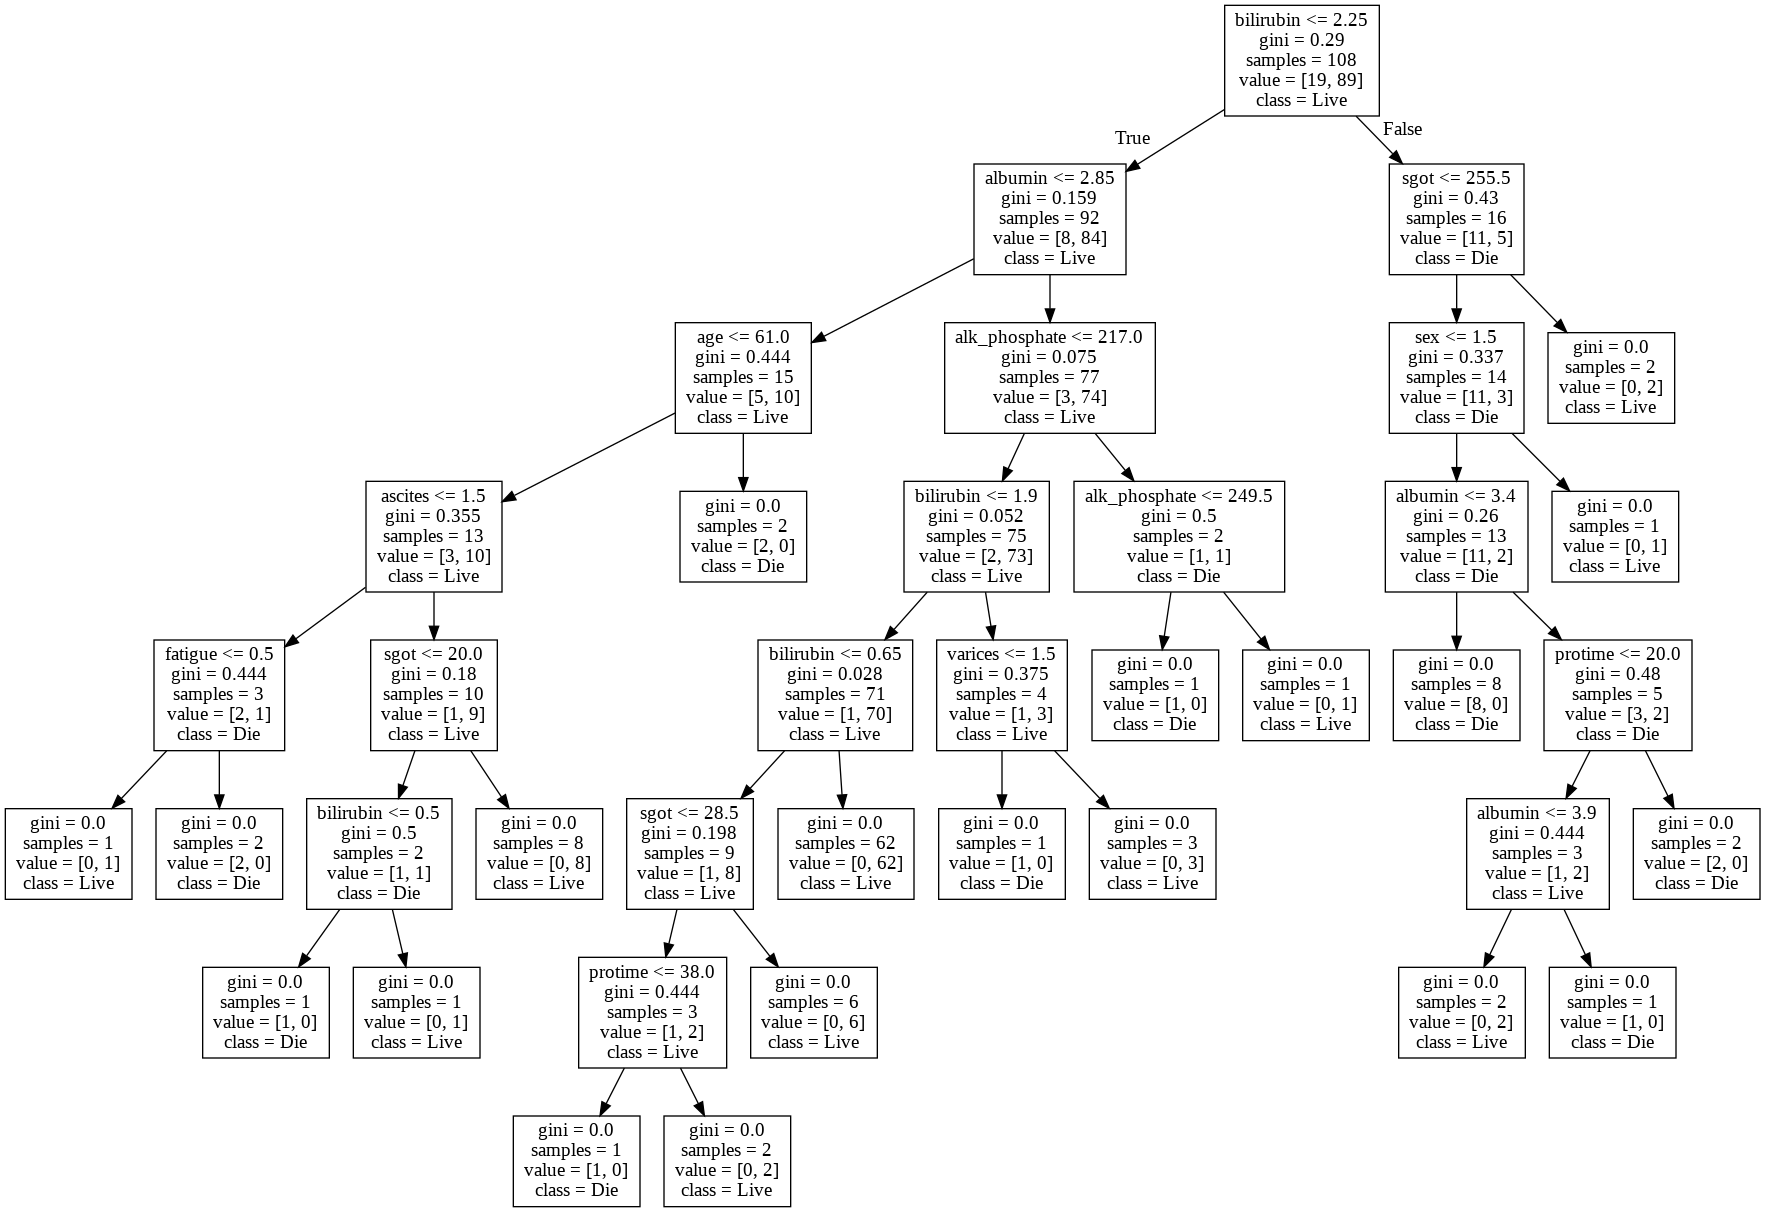

In [106]:
Image(graph.create_png())

In [107]:
# Save the plot
graph.write_png("hep_decisition_tree_plot.png")

True

### Interpret Model & Evaluate
+ Eli5
+ Lime
+ SHAP
+ Skater


In [108]:
pip install lime

#### Intepreting with Lime

In [109]:
import lime
import lime.lime_tabular

In [110]:
# Methods and Attributes
dir(lime)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'discretize',
 'exceptions',
 'explanation',
 'lime_base',
 'lime_tabular']

<h3>Create Lime Explainer</h3>

+ LimeTabularExplainer = Tables
+ LimeTextExplainer = Text
+ LimeImageExplainer = Images

In [111]:
feature_names_best

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

In [112]:
target_names

['Die', 'Live']

In [113]:
class_names = ["Die(1)","Live(2)"]

In [114]:
# Create Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_b.values,
                                                   feature_names=feature_names_best,
                                                   class_names=class_names,
                                                   discretize_continuous=True)

In [115]:
x1

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

In [116]:
x_test_b.iloc[1]

age               58.0
sex                1.0
steroid            2.0
antivirals         2.0
fatigue            1.0
spiders            1.0
ascites            2.0
varices            2.0
bilirubin          2.0
alk_phosphate    167.0
sgot             242.0
albumin            3.3
protime            0.0
histology          1.0
Name: 76, dtype: float64

In [117]:
# predicting the test for one variable
model_logit.predict(np.array(x_test_b.iloc[1]).reshape(1,-1))

array([2])

In [118]:
exp = explainer.explain_instance(x_test_b.iloc[1],model_logit.predict_proba,num_features=14,top_labels=1)

In [119]:
exp.show_in_notebook(show_table=True,show_all=False)

In [120]:
# Explanation as list
exp.as_list()

[('bilirubin > 1.50', -0.4077244800725404),
 ('sex <= 1.00', -0.224307960875199),
 ('spiders <= 1.00', -0.13286741453383183),
 ('histology <= 1.00', 0.11343783886530262),
 ('sgot > 90.50', 0.10161150551820278),
 ('alk_phosphate > 119.25', -0.09937438189354236),
 ('age > 50.25', -0.064093798112929),
 ('1.50 < steroid <= 2.00', 0.04230876459191481),
 ('protime <= 0.00', 0.038461597033340456),
 ('2.98 < albumin <= 4.00', 0.03680491686201595),
 ('fatigue <= 1.00', 0.029470540237230627),
 ('ascites <= 2.00', 0.0),
 ('varices <= 2.00', 0.0),
 ('antivirals <= 2.00', 0.0)]

In [121]:
pip install eli5

In [122]:
import eli5
eli5.show_weights(clf)

Weight,Feature
0.3655,x8
0.1435,x11
0.1087,x10
0.0766,x12
0.0655,x0
0.0598,x9
0.0479,x7
0.0473,x6
0.0426,x4
0.0425,x1


#### Intepreting with Eli5

In [123]:
# Show how each feature contributes
eli5.show_weights(model_logit,top=10)

In [124]:
feature_names_best = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology']

In [125]:
# Show how each feature contributes
eli5.show_weights(model_logit,feature_names=feature_names_best,target_names=class_names)

Weight?,Feature
+1.139,sex
+0.747,spiders
+0.577,ascites
+0.502,albumin
+0.270,steroid
+0.018,<BIAS>
+0.004,sgot
-0.005,protime
-0.006,alk_phosphate
-0.016,age


In [126]:
# Show how each feature contributes
eli5.show_prediction(model_logit,x_test_b.iloc[1],feature_names=feature_names_best,target_names=class_names)

### Evaluation of Model
+ Confuion Matrix
+ Classification Report
+ Accuracy core

<h3>Printing the Confusion Matrix Image</h3>

![](confusionmatrix_image.jpg)

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
y_pred = model_logit.predict(x_test_b)

In [129]:
# Accuracy Score
accuracy_score(y_test,y_pred)

0.723404255319149

In [130]:
# Using Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[ 2, 11],
       [ 2, 32]])

In [131]:
# Plot
from sklearn.metrics import plot_confusion_matrix

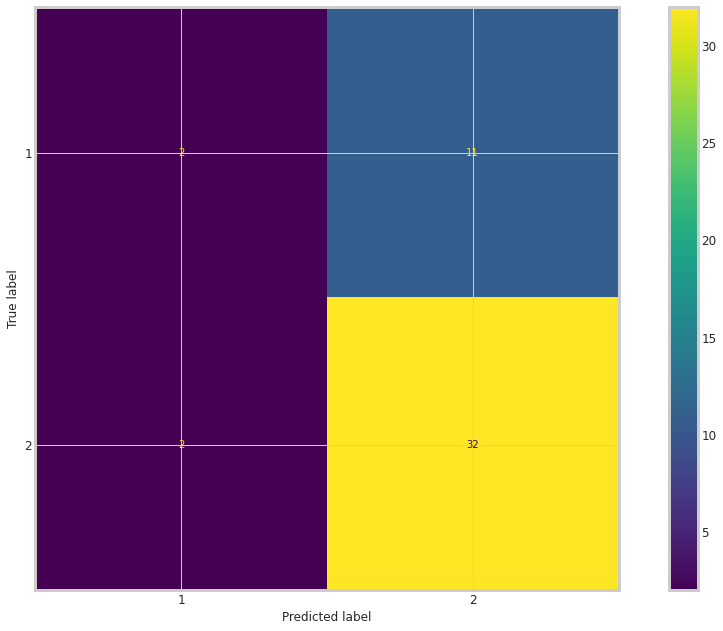

In [132]:
plot_confusion_matrix(model_logit,x_test_b,y_test_b)

In [133]:
# Storing confusion matrix values in different variable.
tp,tf,fn,tn = confusion_matrix(y_test,y_pred).ravel()

In [134]:
tp

2

# Classification report

For calculating precision, recall, f1-score

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [137]:
#### Alt :Pandas_ml
!pip install pandas_ml

In [138]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test,y_pred)
cm.print_stats()

cm.plot(normaized=True)
plt.show()

AttributeError: ignored

In [ ]:
class_names

In [ ]:
print(classification_report(y_test,y_pred,target_names=class_names))

In [ ]:
### 
Thanks For Watching
Jesus Saves

In [ ]:
df.to_csv("clean_hepatitis_dataset.csv",index=False)

In [ ]:
freq_df.head()

In [ ]:
freq_df.to_csv("freq_df_hepatitis_dataset.csv")